# Taller de Física Computacional

Carlos Ruestes / Cristián Sánchez - Taller de Física Computacional - FCEN - UNCUYO

# Campos electricos y potenciales de cargas puntuales

En este notebook visualizaremos los campos eléctricos y potenciales que rodean a cargas puntuales.

### Ley de Coulomb

La ley de Coulomb nos dice que la fuerza entre dos cargas puntuales está dada por


$$\vec F = k_e \frac{q_1q_2}{r^2}\hat r,$$

donde $k_e$ es la constante de Coulomb, $q_1$ y $q_2$ son las magnitudes de las cargas puntuales, y $r$ la distancia entre las cargas. La constante de Coulomb se expresa usualmente como $k_e=\frac{1}{4\pi\varepsilon_0}\approx 8.988\cdot 10^9 $ Nm$^2$/C$^2$, donde $\varepsilon_0$ es la permitividad del vacío.

### Campo eléctrico

Asumimos que tenemos un cuerpo $A$ cargado eléctricamente en una dada posición espacial.
Si colocamos una carga de prueba $q_0$ en la posición $P$ mediremos una fuerza $\vec F_0$ ejercida por $A$ en la carga. Si la carga de prueba es removida y reemplazada por una carga $q_1$ esta nueva carga experimentará una fuerza $\frac{\vec F_0}{q_0}q_1$. Esto significa que uno puede pensar la fuerza ejercida en la carga de prueba como una propiedad de la posición espacial en el espacio de algo creado por $A$. Llamamos a esta propiedad *el campo eléctrico* $\vec E$. En otras palabras **la fuerza eléctrica en un cuerpo es ejercida por el campo eléctrico generado por *otros* cuerpos cargados**. Definimos el campo eléctrico como

$$\vec E = \frac{\vec F_0}{q_0}.$$

Para una carga puntual tenemos que

$$\vec E= k_e \frac{q_1}{r^2}\hat r.$$

### Superposición de cargas

Notemos que la superposición de cargas es válida para la ley de Coulomb, esto significa que la fuerza y el campo eléctrico generado por dos (o más) cargas puntuales es la suma de las fuerzas o campos eléctricos generados por cada una de las cargas. Matemáticamente podemos escribir la fuerza ejercida en una carga $q$ por un conjunto de cargas $\{q_i\}$ como

$$\vec F_{tot} = \sum_i  \vec F_i = k_eq\sum_i \frac{q_i}{r_i^2}\hat r_i,$$

donde $r_i$ es la distancia entre las cargas $q$ y $q_i$. De la misma manera tenemos

$$\vec E = \sum_i\vec E_i=k_e\sum_i \frac{q_i}{r_i^2}\hat r_i.$$

Si pasamos de la suma a una integral podemos describir distribuciones continuas de carga, pero eso no se trata en este notebook.

Como es usual, comenzamos importando algunos paquetes y estableciendo parámetros comunes para las figuras.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
#plt.style.use('bmh')

### Cálculo y visualización de campos eléctricos

Existen situaciones en las que queremos visualizar el campo eléctrico alrededor de alguna distribución de carga. Esto se hace a partir de líneas de campo que muestran la dirección del vector campo $\vec E$ en cada punto. También se puede expresar la magnitud utilizando colores, el grosor de las líneas de campo o el largo de flechas. Es usualmente dificil o imposible el calcular o dibujar exactamente las líneas de campo. Es ahí cuando el uso del *Python* se vuelve útil.

Cremos un pedazo de código que calcula y dibuja el campo eléctrico alrededor de un número arbitrario de cargas a su vez arbitrarias. Para simplificar las cosas haremos los gráficos en dos dimensiones.

In [2]:
k = 8.99*10**9  # [Nm^2/C^2], en la ley de Coulomb

In [3]:
# Definimos dos cargas positivas y tres negativas
# como tuplas de los elementos (x [m], y [m], q [C])
C = [(-3,0,1), (3,0,1), (0,3,-1), (0,-3,-1), (0,-1,-5)] 

In [4]:
# Esta será la región del plano en la que haremos nuestros gráficos
[xmin, xmax, ymin, ymax] = [-5, 5, -5, 5]

In [5]:
# Armamos una grilla sobre la región definida 
# utilizamos la estructura que mostramos en la clase de NumPy (pag. 6 de 17_numpy.pdf)
ngrid = 200
x = np.linspace(xmin,xmax,ngrid)
y = np.linspace(ymin,ymax,ngrid)
X, Y = np.meshgrid(x,y)

In [6]:
# Calculamos las componentes x e y del campo
Ex, Ey = np.zeros_like(X), np.zeros_like(y) # En estos arreglos almacenaremos las componentes

# Hacemos un bucle sobre las cargas evaluando el campo sobre la grilla
# notar que tanto la construcción de la distancia como de las componentes se 
# hace de forma 'vectorial'

for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    Ex = Ex + k*C[i][2]/R**2*(X-C[i][0])/R
    Ey = Ey + k*C[i][2]/R**2*(Y-C[i][1])/R

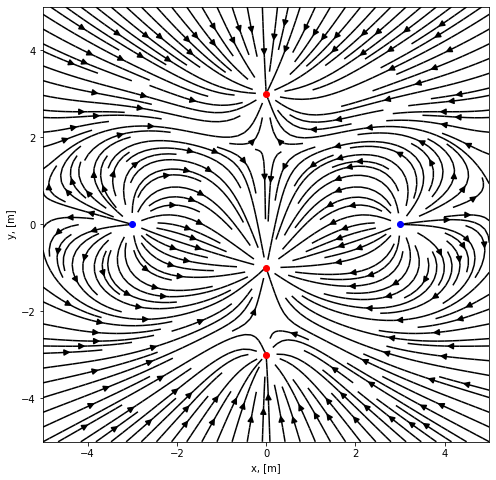

In [7]:
plt.figure(figsize=(8, 8))

# Dibujamos las cargas una por una, coloreadas de acuerdo al signo
for i in range(0, len(C)):
    if C[i][2] > 0:
        color = 'bo'
    elif C[i][2] < 0:
        color = 'ro'
    else:
        color = 'wo'
    plt.plot(C[i][0], C[i][1], color) 
plt.axis([xmin, xmax, ymin, ymax])
    
# Graficamos ahora el campo, si toma mucho tiempo, bajar density 1.
# De hecho, jugar con el parámetro density para ver su efecto.
plt.streamplot(X, Y, Ex, Ey, color='k', density=2, arrowstyle='simple')
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')
plt.show()

### Potenciales eléctricos

La energía potencial $U$ necesaria para mover una carga eléctrica $q_0$ de una posición $a$ a una posición $b$ en un dado campo eléctrico $\vec{E}$ es

$$U_{ab}=\int_a^b \vec F \cdot \text{d}\vec l = \int_a^bq_0 \vec E\cdot \text d \vec l.$$

Como hicimos anteriormente, dividimos por la carga de prueba $q_0$ y obtenemos una cantidad escalar que es independiente de su valor. A esta cantidad la llamamos potencial eléctrico $V$, y su cambio está dado por:

$$\Delta V = V_a-V_b = \int_a^b \vec E\cdot \text d\vec l.$$

A menudo la fuerza a una distancia infinita del sistema de cargas es nula, $F_\infty=0$, y el potencial allí $V_\infty$ es por lo tanto elegido como una referencia y establecido como nulo, $V_\infty\equiv 0$. Esto también nos da la relación

$$\vec E = -\nabla V = - \left(\frac{\partial V}{\partial x}, \frac{\partial V}{\partial y}, \frac{\partial V}{\partial z}\right).$$

Esto significa que una superficie con un determinado potencial $V(x,y,z)=\xi$, la llamada superficie equipotencial, es normal a las líneas de campo eléctrico. 

En el caso discreto, el potencial eléctrico generado por una colección de cargas puntuales está dado por
$$V=\frac{U}{q_0}=k_e\sum_i\frac{q_i}{r_i}.$$

Es más fácil calcular el campo eléctrico a partir de un potencial que si procedemos de la manera inversa.

El potencial puede visualizarse como superficies equipotenciales (o curvas en dos dimensiones) en diferentes colores y/o con una dada diferencia de potencial entre ellas. Un potencial bidimensional también puede ser visualizado en tres dimensiones.

Llevemos a cabo los mismos cálculos que arriba, pero esta vez calculemos el campo eléctrico a partir del potencial, $\vec E = -\nabla V$, y grafiquémoslos juntos.

In [8]:
# Calculemos el potencial
V = np.zeros_like(X) # Inicializamos a cero el arreglo donde lo almacenaremos

# Hacemos un bucle sobre las cargas evaluando el potencial sobre la grilla
# notar de nuevo que tanto la construcción de la distancia como de las componentes se 
# hace de forma 'vectorial'
for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    V = V + k*C[i][2]/R

In [9]:
# Un poco de magia de Numpy para calcular el campo a partir del potencial
Ey, Ex = np.gradient(-V)

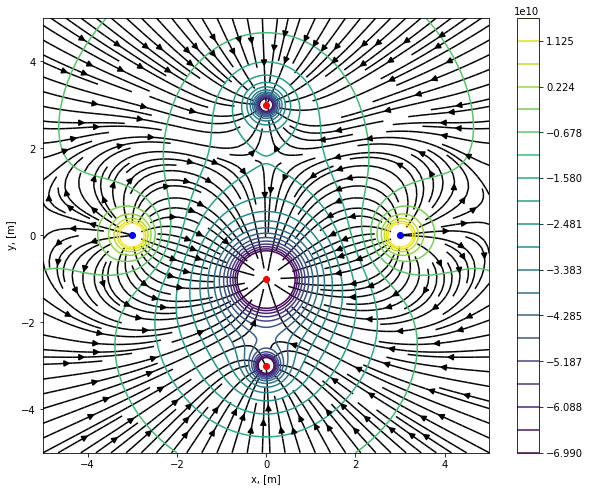

In [10]:
plt.figure(figsize=(10, 8))

for i in range(0, len(C)):
    if C[i][2] > 0:
        color = 'bo'
    elif C[i][2] < 0:
        color = 'ro'
    else:
        color = 'wo'
    plt.plot(C[i][0], C[i][1], color) 

# Armamos un arreglo con los valores de potencial para las curvas equipotenciales
# Nótese que el potencial se va a más o menos infinito cerca de las cargas puntuales,
# debemos por lo tanto excluír los valores máximo y mínimo, elegimos graficar un rango
# desde un 5% del potencial mínimo a un 5% del potencial máximo
equip_surf = np.linspace(np.min(V)*0.05, np.max(V)*0.05, 20)

# Graficamos el resultado del campo
plt.streamplot(X, Y, Ex, Ey, color='k', density=2, arrowstyle='simple')
# Graficamos el resultado del potencial
contour_surf = plt.contour(X, Y, V, equip_surf)
# Armamos una escala para los colores de las equipotenciales
plt.colorbar(contour_surf, extend='both')
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')
plt.show()